<a href="https://colab.research.google.com/github/hadiahmed1/DeepLearningForCV_FCC/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAR PRICE PREDICTION

In [25]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
import numpy as np


## Data Prepration

In [2]:
data=pd.read_csv('train.csv')
data

v.id  on road old  on road now  years      km  rating  condition  \
0       1       535651       798186      3   78945       1          2   
1       2       591911       861056      6  117220       5          9   
2       3       686990       770762      2  132538       2          8   
3       4       573999       722381      4  101065       4          3   
4       5       691388       811335      6   61559       3          9   
..    ...          ...          ...    ...     ...     ...        ...   
995   996       633238       743850      5  125092       1          6   
996   997       599626       848195      4   83370       2          9   
997   998       646344       842733      7   86722       1          8   
998   999       535559       732439      2  140478       4          5   
999  1000       590105       779743      5   67295       4          2   

     economy  top speed   hp  torque  current price  
0         14        177   73     123       351318.0  
1          9        148   74      95       285001.5  
2         15        181   53      97       215386.0  
3         11        197   54     116       244295.5  
4         12        160   53     105       531114.5  
..       ...        ...  ...     ...            ...  
995       11        171   95      97       190744.0  
996       14        161  101     120       419748.0  
997        9        196  113      89       405871.0  
998        9        184  112     128        74398.0  
999        8        199   99      96       414938.5  

[1000 rows x 12 columns]

KeyboardInterrupt: 

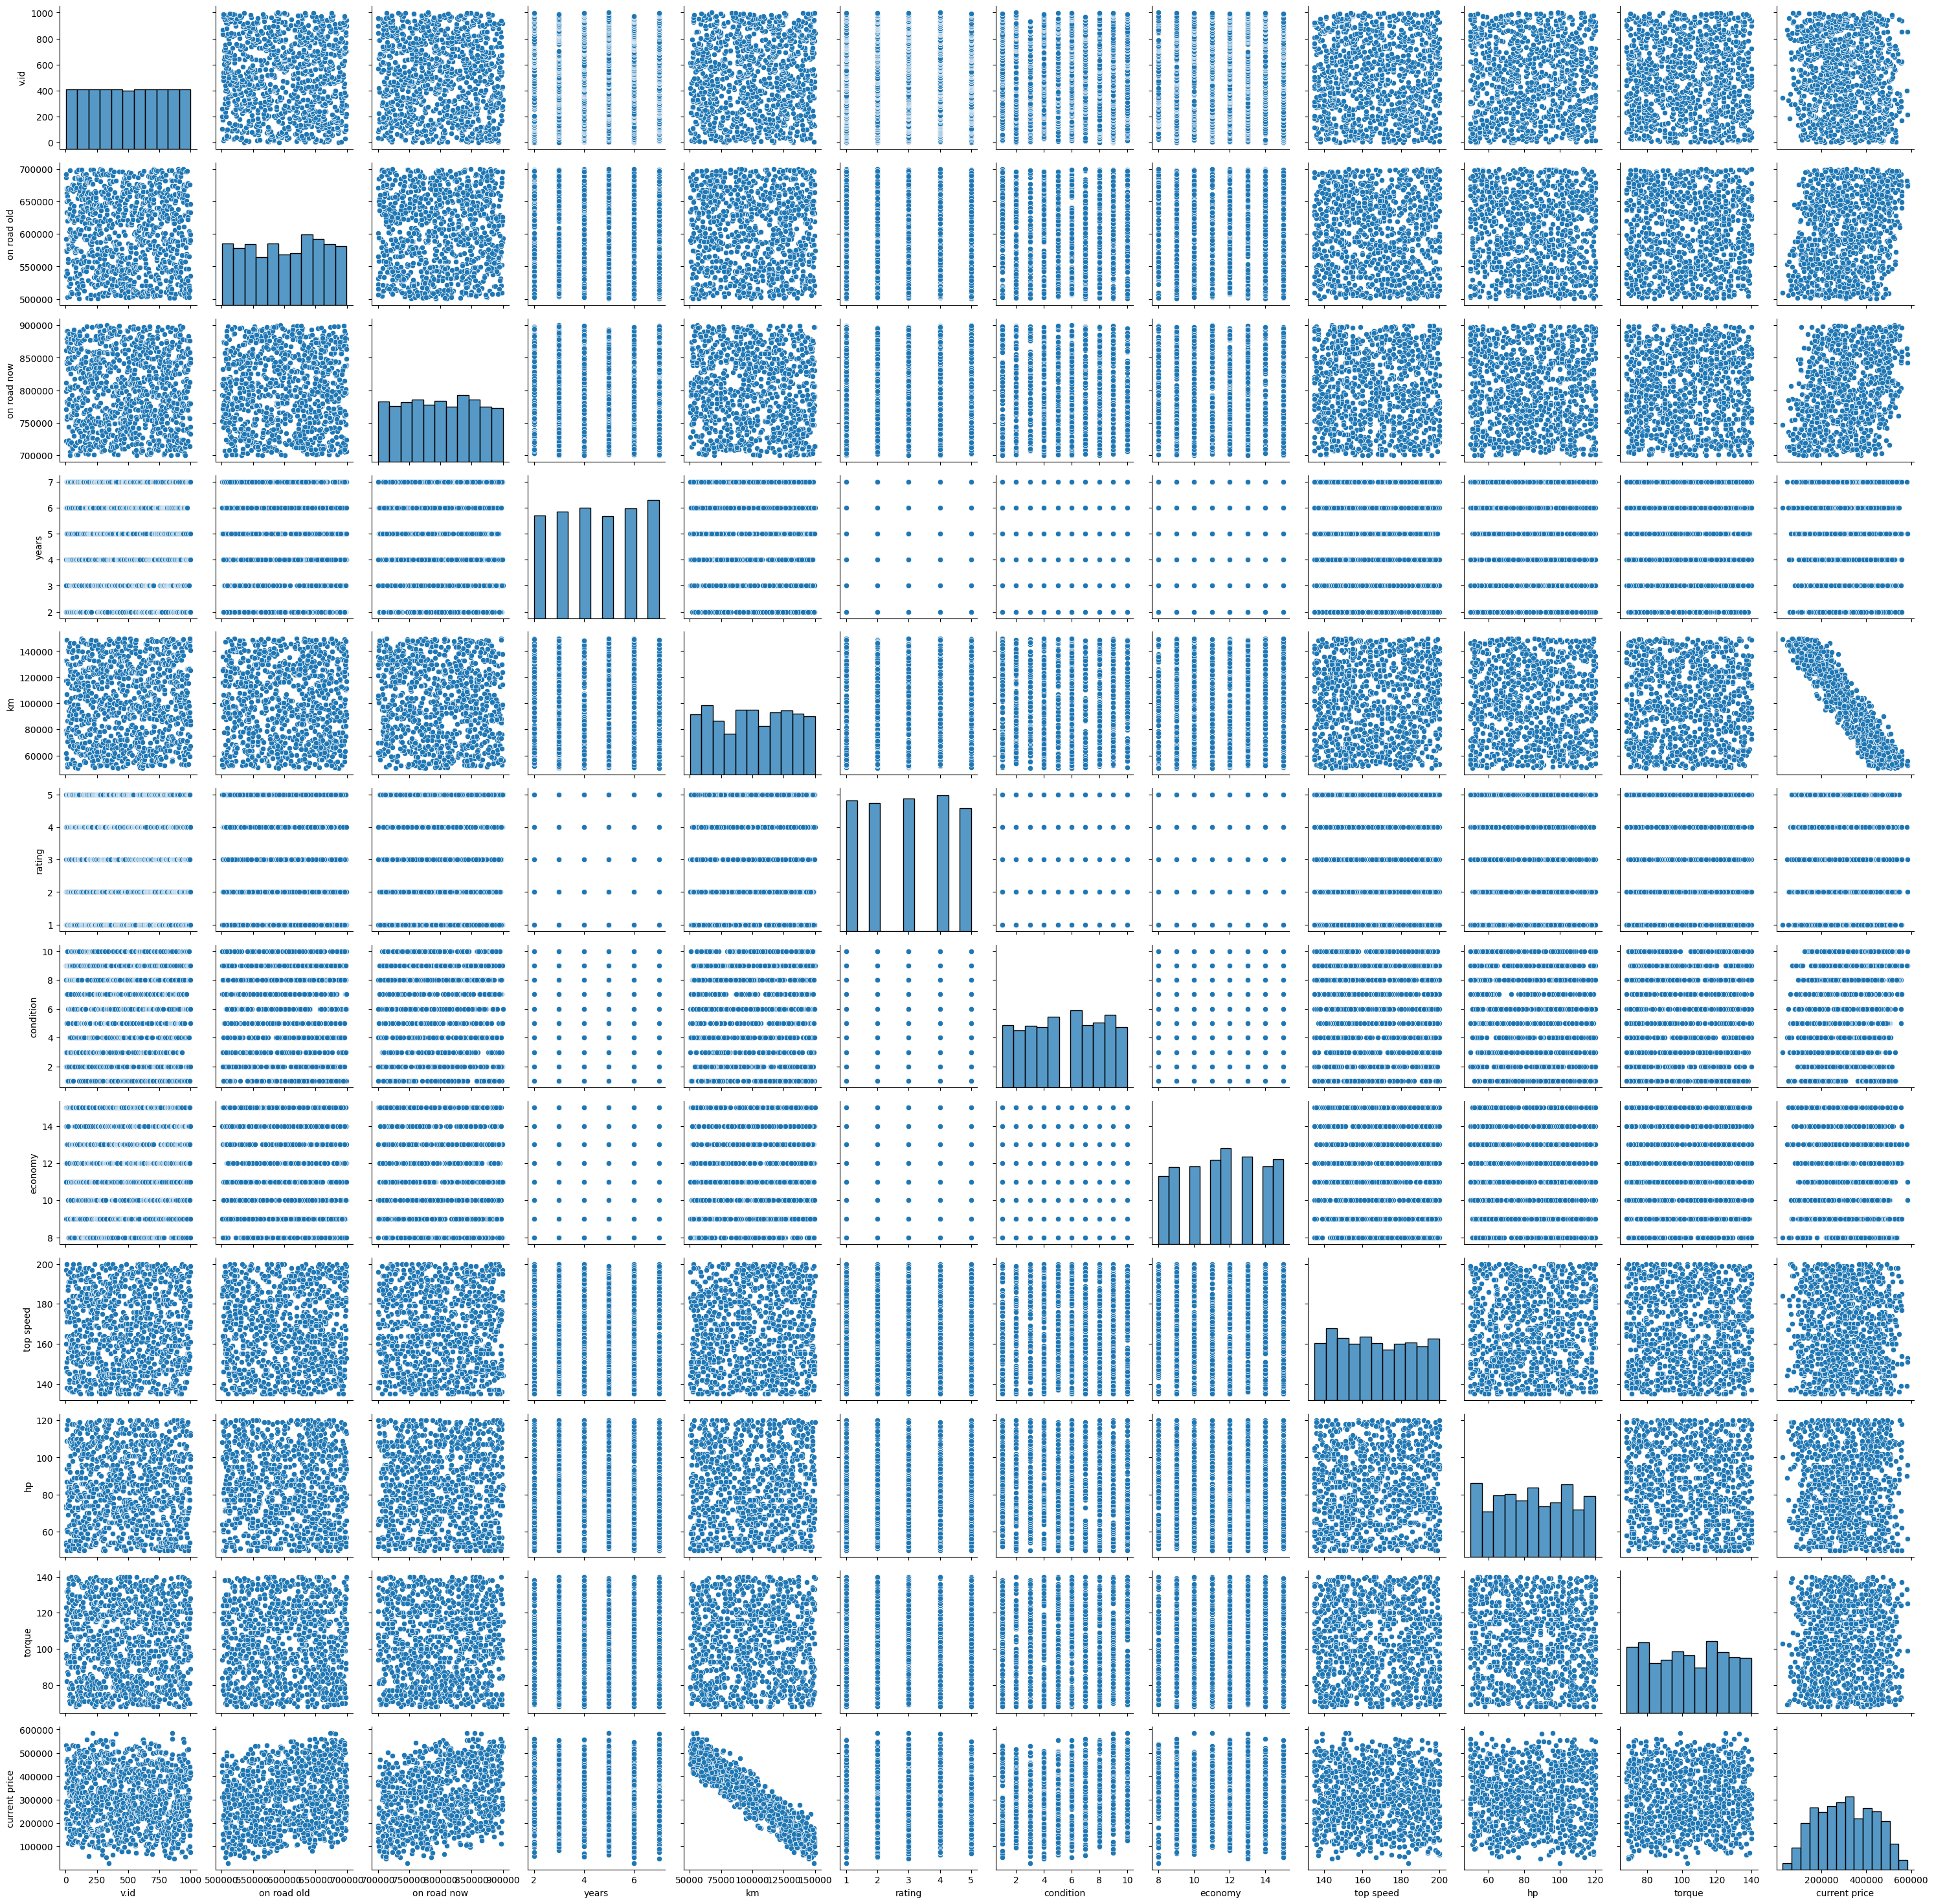

In [3]:
sns.pairplot(data[['v.id',	'on road old',	'on road now',	'years',	'km',	'rating',	'condition',	'economy',	'top speed',	'hp',	'torque',	'current price']])

In [4]:
tensor_data=tf.constant(data)
tensor_data=tf.cast(tensor_data,tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [5]:
tensor_data=tf.random.shuffle(tensor_data)
print(tensor_data[:10])

tf.Tensor(
[[1.760000e+02 6.551710e+05 7.976650e+05 6.000000e+00 6.454700e+04
  1.000000e+00 2.000000e+00 1.500000e+01 1.720000e+02 5.600000e+01
  9.900000e+01 4.646345e+05]
 [8.160000e+02 6.688170e+05 7.848450e+05 5.000000e+00 1.296610e+05
  1.000000e+00 1.000000e+00 1.300000e+01 1.470000e+02 8.700000e+01
  1.130000e+02 2.068835e+05]
 [8.330000e+02 6.419480e+05 7.084980e+05 4.000000e+00 8.752800e+04
  4.000000e+00 9.000000e+00 1.300000e+01 1.900000e+02 5.600000e+01
  1.140000e+02 3.549000e+05]
 [9.300000e+02 6.549840e+05 7.684310e+05 3.000000e+00 1.132920e+05
  2.000000e+00 5.000000e+00 8.000000e+00 1.470000e+02 1.180000e+02
  1.400000e+02 2.602310e+05]
 [3.850000e+02 5.724460e+05 8.700380e+05 3.000000e+00 1.322740e+05
  4.000000e+00 7.000000e+00 1.400000e+01 1.470000e+02 5.400000e+01
  1.000000e+02 2.011885e+05]
 [8.980000e+02 5.819500e+05 7.397220e+05 3.000000e+00 1.387150e+05
  1.000000e+00 6.000000e+00 1.400000e+01 1.590000e+02 1.010000e+02
  1.010000e+02 1.100215e+05]
 [9.410000e

In [6]:
x=tensor_data[:,3:-1]
y=tensor_data[:,-1]
y=tf.expand_dims(y,axis=-1)
print(y.shape)
print(x.shape)

(1000, 1)
(1000, 8)


In [7]:
x_train=x[:800]
y_train=y[:800]
x_val=x[800:900]
y_val=y[800:900]
x_test=x[900:1000]
y_test=y[900:1000]
print(x_train.shape)
print(y_train.shape)
normalizer=Normalization()
normalizer.adapt(x_train)
normalizer(x)[:5]

(800, 8)
(800, 1)


<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.8231142 , -1.2337484 , -1.3929242 , -1.293641  ,  1.4738246 ,
         0.24595967, -1.3798336 , -0.20548655],
       [ 0.24243419,  1.003334  , -1.3929242 , -1.6481847 ,  0.58430374,
        -1.0438126 ,  0.12685415,  0.45452198],
       [-0.3382458 , -0.44420406,  0.73232573,  1.1881644 ,  0.58430374,
         1.1745957 , -1.3798336 ,  0.5016654 ],
       [-0.9189258 ,  0.44095418, -0.68450755, -0.23001012, -1.6394985 ,
        -1.0438126 ,  1.6335418 ,  1.7273955 ],
       [-0.9189258 ,  1.0931073 ,  0.73232573,  0.47907713,  1.0290642 ,
        -1.0438126 , -1.4770392 , -0.15834309]], dtype=float32)>

## Linrar Regression

In [44]:
model=tf.keras.Sequential()
model.add(InputLayer(input_shape=(8,)))
model.add(normalizer)

model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

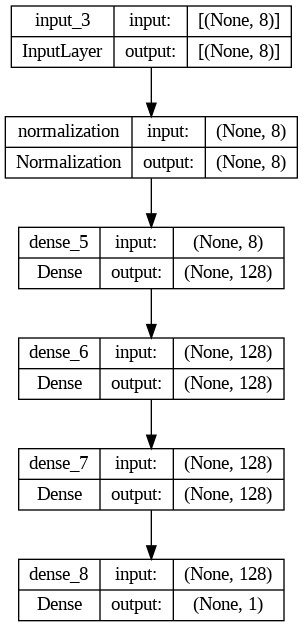

In [45]:
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True)

## Error Sanction

In [47]:
model.compile(optimizer=Adam(learning_rate=0.01),loss= MeanAbsoluteError(),
              metrics=RootMeanSquaredError())

## Training and Optimization

In [48]:
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=100,verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 15ms/step - loss: 306336.0000 - root_mean_squared_error: 331108.9375 - val_loss: 300135.7188 - val_root_mean_squared_error: 327360.2812
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 244533.7344 - root_mean_squared_error: 277700.5625 - val_loss: 136635.8438 - val_root_mean_squared_error: 163736.5156
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 78672.2656 - root_mean_squared_error: 101005.8672 - val_loss: 47255.0000 - val_root_mean_squared_error: 58361.7070
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 41877.3438 - root_mean_squared_error: 51875.4805 - val_loss: 42822.0469 - val_root_mean_squared_error: 53461.1484
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 40560.0625 - root_mean_squared_error: 50390.8242 - val_loss: 39662.5664 - val_root_mean_squared_error: 51032.9180
Epoch 6/100
25/25 [==============================] - 0s

In [42]:
history.history

{'loss': [307793.875,
  306541.59375,
  294771.375,
  239992.515625,
  130606.609375,
  68193.1796875,
  45107.83984375,
  40546.078125,
  39418.2734375,
  38760.015625,
  37632.32421875,
  37666.90234375,
  37445.13671875,
  36594.98828125,
  36179.453125,
  36271.7578125,
  35962.07421875,
  36142.12890625,
  35659.30859375,
  35329.3125,
  35041.73828125,
  35111.19921875,
  34936.30859375,
  34883.796875,
  34745.1640625,
  34603.9921875,
  34418.61328125,
  34228.83203125,
  34199.57421875,
  34446.7109375,
  34483.765625,
  34173.6328125,
  33941.34375,
  34143.19140625,
  34063.890625,
  34124.171875,
  33827.015625,
  33836.7734375,
  33589.08984375,
  33713.83203125,
  33719.9765625,
  33580.15234375,
  33826.7265625,
  33479.53515625,
  33417.734375,
  33491.41796875,
  33404.4609375,
  33267.421875,
  33526.96875,
  33218.65625,
  33306.62890625,
  33173.75,
  33310.27734375,
  32980.68359375,
  33140.5234375,
  33529.015625,
  33199.37890625,
  33483.8515625,
  33147.136718

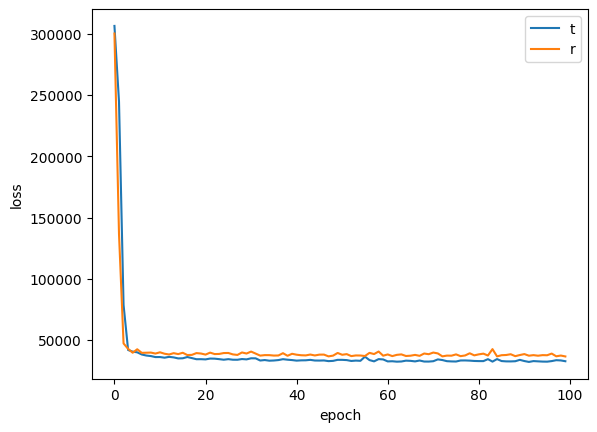

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train')
plt.show()

## Performance Measurement


In [51]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 35108.1445 - root_mean_squared_error: 42569.4922


[35108.14453125, 42569.4921875]

# Validation and Testing

In [52]:
model.predict(tf.expand_dims(x_test[0],axis=0))

1/1 [==============================] - 0s 70ms/step


array([[405849.66]], dtype=float32)

In [53]:
y_pred=list(model.predict(x_test)[:,0])

4/4 [==============================] - 0s 3ms/step


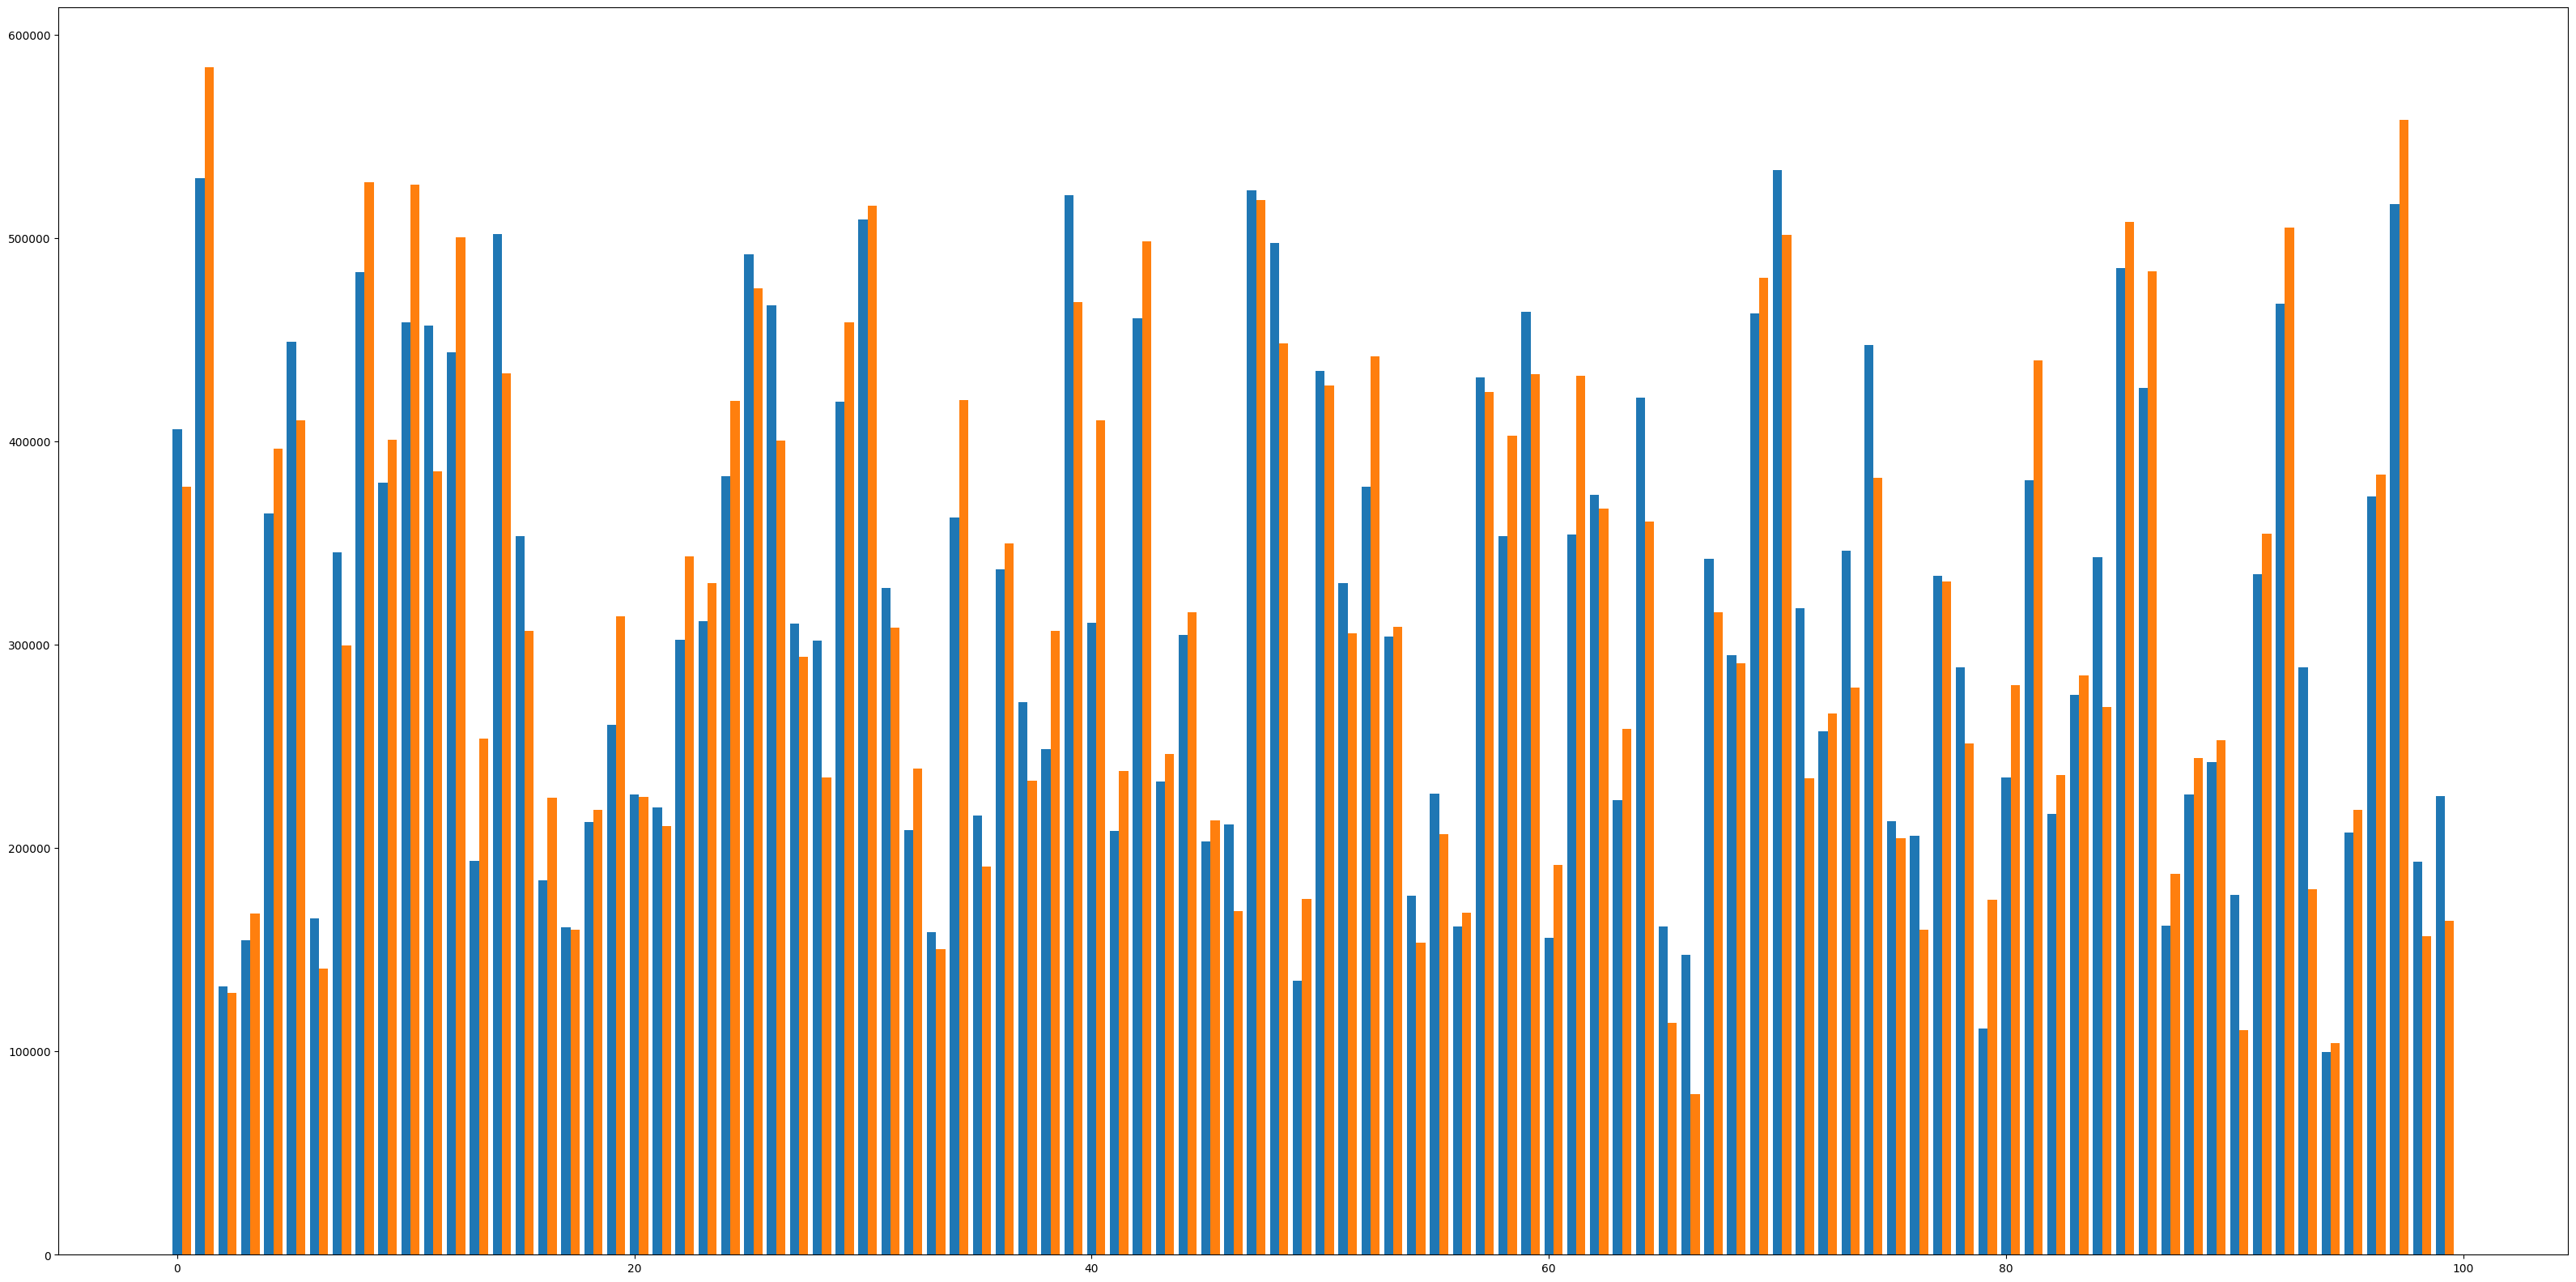

In [54]:
ind=np.arange(100)
plt.figure(figsize=(40,20))
width=0.4
plt.bar(ind,y_pred,width,label="prediction")
plt.bar(ind+width,list(y_test[:,0].numpy()),width,label="Actual")
plt.show()